In [42]:
import pandas as pd, numpy as np
import edhec_risk_kit as erk

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Market returns

In [45]:
total_mkt_ret = erk.get_total_market_index_returns()
total_mkt_index = erk.drawdown(total_mkt_ret).Wealth

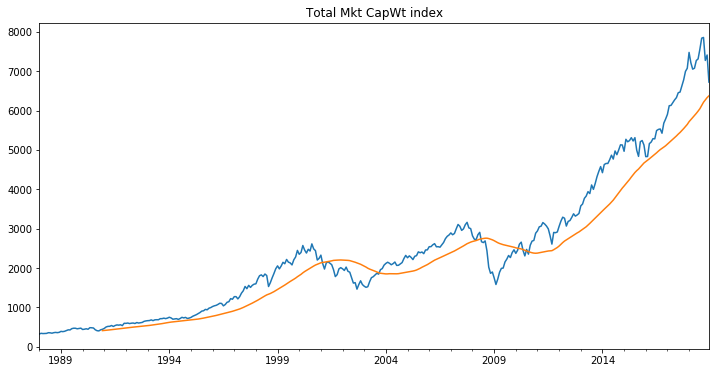

In [19]:
total_mkt_index["1988":].plot(figsize=(12, 6), title="Total Mkt CapWt index")
total_mkt_index["1988":].rolling(window=36).mean().plot()

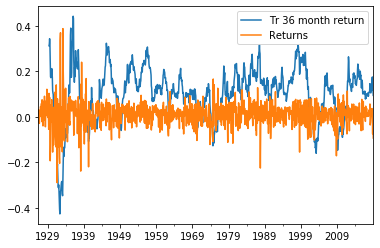

In [22]:
tmi_tr36rets = total_mkt_ret.rolling(window=36).aggregate(erk.annualized_ret, periods_per_year=12)
tmi_tr36rets.plot(label="Tr 36 month return", legend=True)
#total_mkt_ret.plot(label="Returns",legend=True)


### Rolling correlation - along with multi-indexes and `.groupby`

In [24]:
ts_corr = ind_ret.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [25]:
ts_corr.index.names = ['date', 'industry']

In [26]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [31]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())

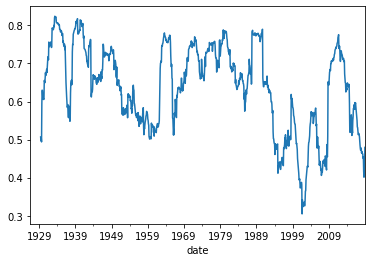

In [32]:
ind_tr36corr.plot()

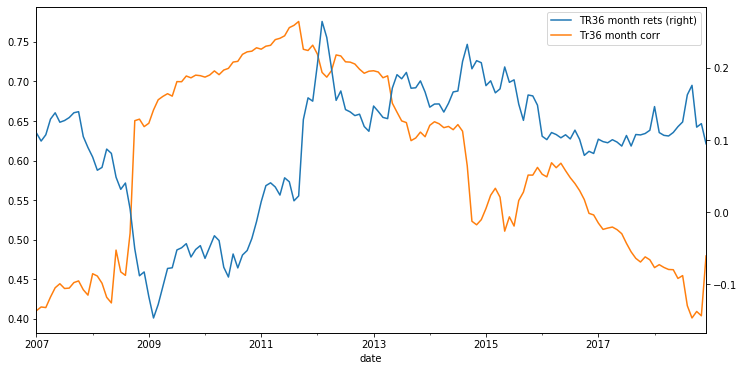

In [38]:
tmi_tr36rets["2007":].plot(label="TR36 month rets", figsize=(12,6), legend=True, secondary_y=True)
ind_tr36corr["2007":].plot(label="Tr36 month corr", legend=True)

# Portfolio Insurance (CPPI)

In [108]:
ind_ret = erk.get_ind_returns()
tmi_ret = erk.get_total_market_index_returns()

In [94]:
risky_r = ind_ret["2000":][["Steel", "Fin", "Beer"]]
start = 1000
floor = 0.8

1. Cushion - (Asset Value minus Floor Value)
2. Compute an allocation safe and risky assets -> m*risk budget
3. Recompute the Asset value based on the returns

In [110]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Max Drawdown
Steel,-0.002790,0.312368,-0.328499,1.196664,0.150097,-0.208117,-0.758017
Fin,0.055166,0.192909,-0.536756,2.066782,0.091196,-0.132175,-0.718465
Beer,0.080598,0.138925,-0.496820,1.226821,0.063007,-0.091442,-0.271368


In [113]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Max Drawdown
Steel,-0.005167,0.174180,-2.008439,14.452894,0.091788,-0.130153,-0.655198
Fin,0.040894,0.131678,-0.952812,3.146613,0.065522,-0.091621,-0.549673
Beer,0.075544,0.115462,-0.673710,1.827194,0.052917,-0.074908,-0.259582


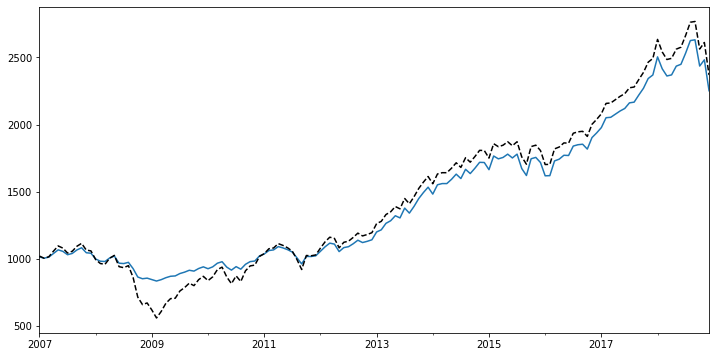

In [115]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(figsize=(12, 6), legend=False)
btr["Risky Wealth"].plot(ax=ax, style="k--", legend=False)

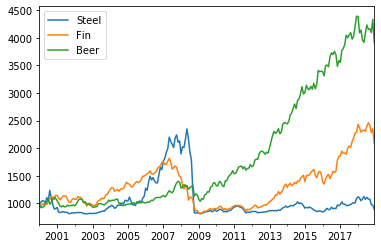

In [71]:
account_history.plot()

In [65]:
account_history

,Steel,Fin,Beer
2000-01,-1.562000e+01,-2.552000e+01,-1.268000e+01
2000-02,-1.068408e+00,2.166648e+00,1.475952e+00
2000-03,-3.728744e-02,5.416620e-03,3.689880e-03
2000-04,3.132145e-04,1.354155e-05,9.224700e-06
2000-05,7.830362e-07,3.385388e-08,2.306175e-08
...,...,...,...
2018-08,0.000000e+00,0.000000e+00,0.000000e+00
2018-09,0.000000e+00,0.000000e+00,0.000000e+00
2018-10,0.000000e+00,0.000000e+00,0.000000e+00
2018-11,0.000000e+00,0.000000e+00,0.000000e+00


In [79]:
risky_wealth

,Steel,Fin,Beer
2000-01,972.300000,955.800000,977.200000
2000-02,1038.805320,874.652580,863.453920
2000-03,1075.059626,1020.632096,864.576410
2000-04,1066.029125,977.255232,896.392822
2000-05,1013.580492,1026.704346,1002.794650
...,...,...,...
2018-08,1306.624224,3283.129665,4629.014147
2018-09,1297.869842,3219.765263,4637.809274
2018-10,1147.187153,3044.288056,4564.995669
2018-11,1112.771539,3132.267981,4829.308918


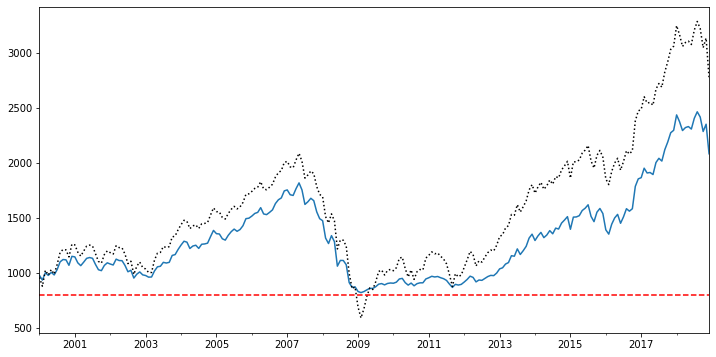

In [86]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color="r", linestyle="--")

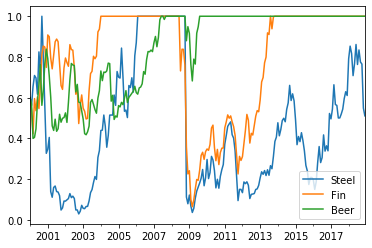

In [85]:
risky_w_history.plot()

# Drawdown constraint

In [116]:
l

NameError: name 'l' is not defined

In [120]:
btr = erk.run_cppi(ind_ret["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)

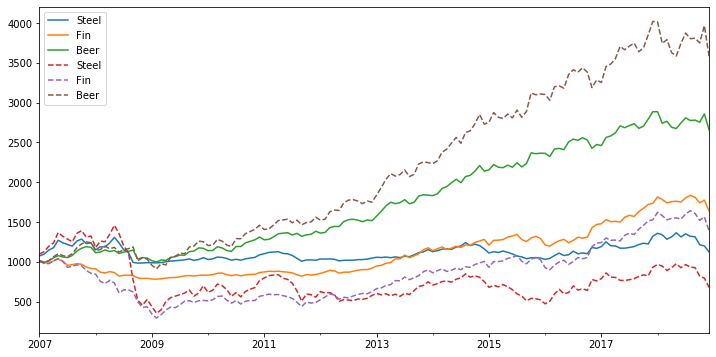

In [123]:
ax = btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax, style="--")